## INCLUDES:

- LOGISTIC REGRESSION

- DECISION TREE CLASSIFIER

- RANDOM FOREST CLASSIFIER

- GRADIENT BOOSTING CLASSIFIER

In [18]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import my_pickle as mp
import my_resample as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
# from scipy import interp
# from random import *
# import matplotlib.pyplot as plt
# %matplotlib inline

# from sklearn.ensemble.partial_dependence import plot_partial_dependence
# from sklearn.ensemble.partial_dependence import partial_dependence

In [10]:
X = mp.unjson_it('data_X')
y = mp.unjson_it('data_y')['response']
text_similarity_df = mp.unjson_it('data_text_similarity')
X['count_similarity'] = text_similarity_df['count_similarity']
X['tfidf_similarity'] = text_similarity_df['tfidf_similarity']

# PREPARE DATA

same train test split, resample, and scaling for everything

In [107]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

# resample
X_train, y_train = ms.oversample(X_train, y_train, .5)

# # scale data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# make fake data
pred_all_0 = [0]*len(y_test)
pred_all_1 = [1]*len(y_test)
pred_50_50 = np.random.choice([0,1], size=len(y_test))
pred_90_10 = np.random.choice([0,1], size=len(y_test), p=[.9,.1])

In [118]:
def display_feature_importances():
    # show feature importances
    feature_df = pd.DataFrame([X.columns, model.feature_importances_]).T
    feature_df.columns = ['feature','value']
    return feature_df.sort_values('value', ascending=False)
             
def display_metrics():
    print("\nMETRICS")
    print("Model recall: {}".format(recall_score(y_test, y_pred)))
    print("Model precision: {}".format(precision_score(y_test, y_pred)))
    print("Model accuracy: {}".format(model.score(X_test, y_test)))

    print ("\nCONFUSION MATRIX")
    print (confusion_matrix(y_test, y_pred))
    print ("\nkey:")
    print (" TN   FP ")
    print (" FN   TP ")

    print("\nRECALL AND ACCURACY FOR DIFFERNET MODELS")
    print("recall     \t precision   \tmodel")
    print(recall_score(y_test, y_pred), '\t',precision_score(y_test, y_pred), "my model")
    print(recall_score(y_test, pred_all_0),'\t','\t', precision_score(y_test, pred_all_0), "\t\tpredict all zero")
    print(recall_score(y_test, pred_all_1),'\t','\t', precision_score(y_test, pred_all_1), "predict all one")
    print(recall_score(y_test, pred_50_50),'\t', precision_score(y_test, pred_50_50), "predict 50-50")
    print(recall_score(y_test, pred_90_10), precision_score(y_test, pred_90_10), "predict 90-10")

# RANDOM FOREST CLASSIFIER

In [75]:
# fit model
model = RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=3, n_estimators=100, n_jobs=-1)
my_pipeline(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# GRADIENT BOOSTING CLASSIFIER

In [122]:
%%time
# fit model
model = GradientBoostingClassifier(learning_rate= 0.4, 
                                   max_depth= 10, 
                                   min_samples_leaf= 2, 
                                   min_samples_split= 3, 
                                   n_estimators= 100, 
                                   subsample= 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: user 37 s, sys: 243 ms, total: 37.2 s
Wall time: 37.9 s


In [123]:
# show metrics
display_metrics()


METRICS
Model recall: 0.15017064846416384
Model precision: 0.5
Model accuracy: 0.8946800862688713

CONFUSION MATRIX
[[2445   44]
 [ 249   44]]

key:
 TN   FP 
 FN   TP 

RECALL AND ACCURACY FOR DIFFERNET MODELS
recall     	 precision   	model
0.150170648464 	 0.5 my model
0.0 	 	 0.0 		predict all zero
1.0 	 	 0.105319913731 predict all one
0.515358361775 	 0.111029411765 predict 50-50
0.105802047782 0.105442176871 predict 90-10


/Users/gandalf/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
# show feature importances
feature_df = display_feature_importances()
feature_df.head()

,feature,value
6,distance,0.084664
30,len_about_receiver,0.0561247
3,age_receiver,0.0404221
4,age_sender,0.0285078
2,age_dif,0.0279868


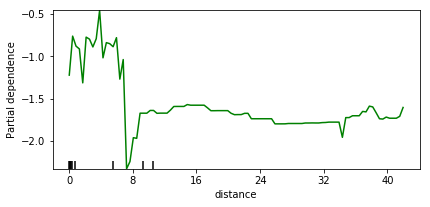

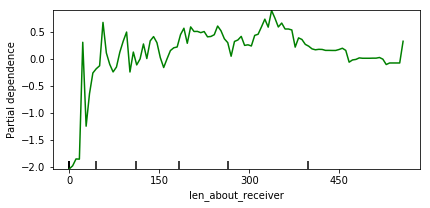

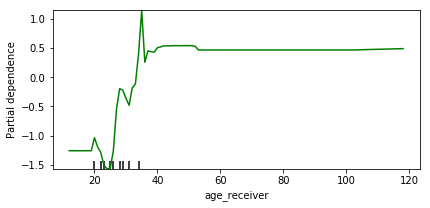

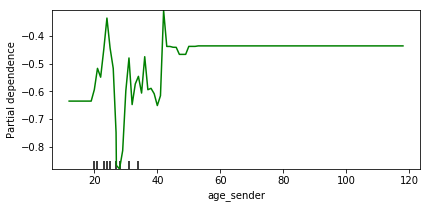

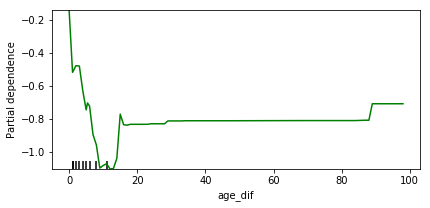

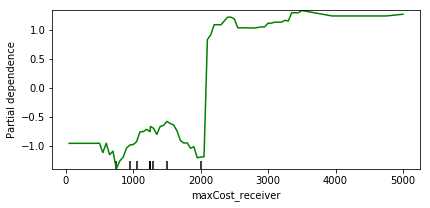

In [125]:
top_features = list(feature_df.sort_values('value', ascending=False).index)
for feature in top_features[:6]:
#     print(type(feature))
    fig, axs = plot_partial_dependence(model, X_train, [feature], X.columns) 
plt.show()

# DECISION TREE CLASSIFIER

In [112]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

feature_importances = np.argsort(model.feature_importances_)
top_n = 10
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1])


FEATURE RANKINGS
1 	 len_about_receiver 	 0.0987222652617
2 	 distance 	 0.0641003722951
3 	 maxCost_receiver 	 0.0542291582551
4 	 age_receiver 	 0.0489707926273
5 	 maxCost_sender 	 0.043789381158
6 	 hobbies_overlap 	 0.0426882960004
7 	 minCost_receiver 	 0.0405374614078
8 	 len_about_sender 	 0.0359883732214
9 	 urgency_sender 	 0.0350730427236
10 	 age_dif 	 0.035059271437


# LOGISTIC REGRESSION

In [41]:
model = LogisticRegression()


In [42]:
results_df = pd.DataFrame([X.columns,model.coef_[0]]).T
results_df.columns = ['feature','coefficients']
results_df['abs_val'] = results_df.coefficients.apply(abs)
results_df['sign'] = results_df.coefficients.apply(lambda s: s>0)

In [43]:
results_df.head().sort_values('abs_val', ascending=False)

,feature,coefficients,abs_val,sign
3,age_receiver,0.256471,0.256471,True
2,age_dif,-0.161997,0.161997,False
4,age_sender,0.0864869,0.086487,True
1,I_count_sender,0.0392194,0.039219,True
0,I_count_receiver,-0.00151127,0.001511,False


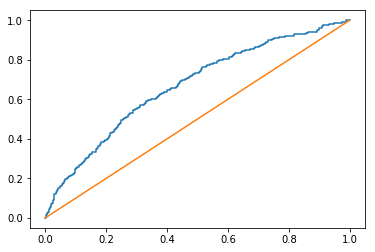

In [64]:
fpr, tpr, thresh = roc_curve(y_test, y_pred_coef[:,1])
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1,.001),np.arange(0,1,.001))
plt.show()


# BREAK

In [ ]:
def do_grid_search(X, y):
    '''
    X as 2d numpy array
    y as 1d numpy array
    
    PARAMETERS
    n_estimators: The number of trees in the forest
    criterion: gini or entropy
    max_features: The number of features to consider when looking for the best split
        If int, then consider max_features features at each split.
        If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
        If “auto”, then max_features=sqrt(n_features).
        If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
        If “log2”, then max_features=log2(n_features).
        If None, then max_features=n_features.
    max_depth: The maximum depth of the tree
    n_jobs: The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
    '''
    
    # Split it up into our training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # resample
    X_train, y_train = ms.oversample(X_train.as_matrix(), y_train.as_matrix(), .5)
    
    # Initalize our model here
    model = RandomForestClassifier()

    # Here are the params we are tuning
    param_grid = {'max_features' : [None],
                  'n_estimators' : [50,100,1000],
                  'max_depth': [50],
                  'min_samples_leaf': [3]
                  }

    # Plug in our model, params dict, and the number of jobs, then .fit()
    gs_cv = GridSearchCV(model, param_grid, n_jobs=-1).fit(X_train, y_train)

    # return the best score and the best params
    return gs_cv.best_score_, gs_cv.best_params_

In [ ]:
%%time
model = RandomForestClassifier(max_depth=50, max_features=None, min_samples_leaf=3, n_estimators=100, n_jobs=-1)
fit_model(model, X, y)

In [ ]:
%%time
n = do_grid_search(X, y)
print(n)

In [ ]:
%%time
model = LogisticRegression()
fit_model(model, X, y)

In [ ]:

print ("    Decision Tree:       ", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print ("    Naive Bayes:         ", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [ ]:
# Calculate the standard deviation for feature importances across all trees

n = len(X.columns)

#importances = forest_fit.feature_importances_[:n]
importances = model.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X.columns[indices])

# print("Feature ranking:")
# for f in range(n):
#     print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,12))
plt.title("Feature importances")
plt.bar(range(n), importances[indices], yerr=std[indices], color="r", align="edge", width = -.9)
plt.xticks(range(n), features, rotation=-75)
plt.xlim([-1, n])
plt.show()

In [ ]:
# Try modifying the number of trees, graph results
num_trees = range(5, 50, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
plt.plot(num_trees, accuracies)
plt.xlabel="num_trees"
plt.ylabel="accuracy"
plt.show()

In [ ]:
# Modifying the max features parameter
for nn in range(10):
    num_features = range(2, len(X.columns))
    accuracies = []
    for n in num_features:
        tot = 0
        for i in range(5):
            rf = RandomForestClassifier(max_features=n)
            rf.fit(X_train, y_train)
            tot += rf.score(X_test, y_test)
        accuracies.append(tot / 5)
    plt.plot(num_features, accuracies)
    plt.xlabel="num_features"
    plt.ylabel="accuracy"
plt.show()

In [ ]:
# Run all the other classifiers that we have learned so far in class
def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print ("    Model,                Accuracy, Precision, Recall")
print ("    Random Forest:       ", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=25, max_features=5))
print ("    Logistic Regression: ", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print ("    Decision Tree:       ", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))
print ("    Naive Bayes:         ", get_scores(MultinomialNB, X_train, X_test, y_train, y_test))

In [ ]:
def plot_roc(X, y, clf_class, title, **kwargs):
# def plot_roc(X, y, clf_class, kwargs):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train_index, test_index) in enumerate(kf):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y[test_index], y_prob[test_index, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    mean_tpr /= len(kf)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
    plt.title(title + 'ROC')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
xfake, yfake = np.random.rand(100,6), np.random.randint(0,2, size=(100,))
plt.figure(figsize=(20,16))
print ("Visualize the roc curve of each model")
plot_roc(xfake, yfake, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
#plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
#plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') error
print('\nPlotting completed.')

In [ ]:
print ("Visualize the roc curve of each model")
plot_roc(X, y, RandomForestClassifier, 'Random_Forest', n_estimators=25, max_features=5)
plot_roc(X, y, LogisticRegression, 'Logistic_Regrssion')
plot_roc(X, y, DecisionTreeClassifier, 'Decision_Tree')
#plot_roc(X, y, MultinomialNB, 'Naive_Bayes') error
print('\nPlotting completed.')